In [3]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.metrics import classification_report, accuracy_score

In [4]:
import pandas as pd
df = pd.read_csv("final.csv", low_memory=False)
df.head()

,Sl no,Name,Profile ID,Comment,Comment_Tokens,comment_length,word_count,sentiment_score,sentiment_class
0,1,scotty2jatty,398274122,you better do dirty,"better,dirty",19,4,0,neutral
1,2,angelasanders975,65963290409,thats soooooooooo right,"thats,soooooooooo,right",23,3,0,neutral
2,3,myleslewis_24,11687291106,bro i want that shirt,"bro,want,shirt",21,5,1,positive
3,4,miladheydarpour1369,7529960718,good,good,4,1,3,positive
4,5,matthew_williams224,25240207448,bro he only needs to beat jakes ass,"bro,needs,beat,jakes,ass",35,8,-7,negative


In [5]:
df['sentiment_class'] = df['sentiment_class'].replace('neutral', 'positive')

In [6]:
# Define a mapping dictionary for sentiment classes
sentiment_mapping = {
    'positive': 1,
    'negative': 0
}

# Apply the mapping to the 'sentiment_class' column to create a numerical 'sentiment_label'
df['sentiment_label'] = df['sentiment_class'].map(sentiment_mapping)

# Display the first few rows to confirm
print(df[['sentiment_label', 'sentiment_class']].head())

   sentiment_label sentiment_class
0                1        positive
1                1        positive
2                1        positive
3                1        positive
4                0        negative


In [7]:
# Prepare the features (X) and target (y)
X = df['Comment']  # Text df
y = df['sentiment_label']  # Sentiment labels

In [12]:
# Convert text data into numerical format using TF-IDF Vectorizer
import joblib
vectorizer = HashingVectorizer(n_features=10000) # Remove common stop words
joblib.dump(vectorizer, 'hashing_vectorizer.pkl')
joblib.dump(X, 'X_hashed.pkl')

['X_hashed.pkl']

In [14]:
X = vectorizer.transform(df['Comment'])  # Ensure df['Comment'] is your text column
y = df['sentiment_label']

In [15]:


# Split the data into training and testing sets (70% for training, 30% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
# Create and train the SVM model with a linear kernel
svm_model = SVC(kernel='linear')  # Use 'rbf' or 'poly' for other kernels
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [17]:
# Create and train the SVM model with a linear kernel
svm_model = SVC(kernel='poly')  # Use 'rbf' or 'poly' for other kernels
svm_model.fit(X_train, y_train)

SVC(kernel='poly')

In [18]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test)

In [19]:
# Evaluate the model's performance
print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

SVM Accuracy: 0.8192534381139489
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.72      0.79       717
           1       0.79      0.90      0.84       810

    accuracy                           0.82      1527
   macro avg       0.83      0.81      0.82      1527
weighted avg       0.83      0.82      0.82      1527



In [20]:
# Function to predict sentiment of user input
def predict_sentiment(user_input):
    # Convert the input sentence to numerical features
    input_tfidf = vectorizer.transform([user_input])
    
    # Predict the sentiment using the trained model
    prediction = svm_model.predict(input_tfidf)
    
    # Return the predicted sentiment class
    return prediction[0]

In [21]:
# Interactive loop to ask the user for input
print("Enter a sentence to predict its sentiment (type 'exit' to stop):")

while True:
    # Get user input
    user_input = input("Your sentence: ")
    
    # Exit condition
    if user_input.lower() == 'exit':
        print("Exiting the program.")
        break
    
    # Predict sentiment
    sentiment = predict_sentiment(user_input)
    
    # Map sentiment to label
    label = "negative" if sentiment == 0 else "positive"
    
    # Print the sentiment
    print(f"Predicted sentiment: {label}")

Enter a sentence to predict its sentiment (type 'exit' to stop):
Predicted sentiment: negative
Exiting the program.


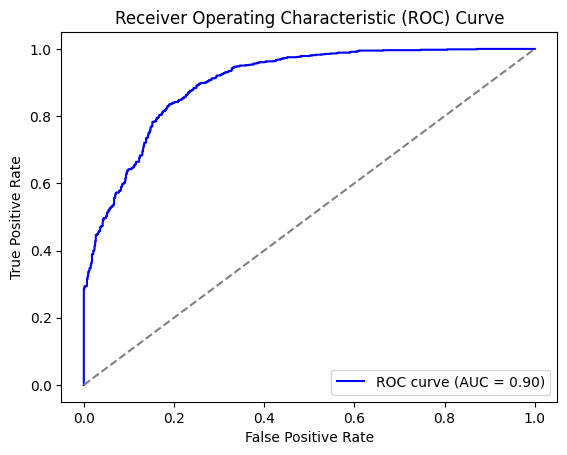

Mean Absolute Percentage Error (MAPE): 9.506172839506172%
      Metric     Value
0    AUC/ROC  0.901538
1  Precision  0.786481
2   Accuracy  0.819253
3        MAE  0.180747
4        MSE  0.180747
5       RMSE  0.425143
6       MAPE  9.506173


In [22]:
from sklearn.metrics import (
    roc_auc_score, precision_score, accuracy_score, mean_absolute_error,
    mean_squared_error, roc_curve
)
import matplotlib.pyplot as plt
import numpy as np

# 1. AUC/ROC
y_pred_prob = svm_model.decision_function(X_test)
auc_score = roc_auc_score(y_test, y_pred_prob)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f"ROC curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()

# 2. Precision
precision = precision_score(y_test, y_pred)

# 3. Accuracy
accuracy = accuracy_score(y_test, y_pred)

# 4. MAE
mae = mean_absolute_error(y_test, y_pred)

# 5. MSE
mse = mean_squared_error(y_test, y_pred)

# 6. RMSE
rmse = np.sqrt(mse)

# 7. MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_indices = y_true != 0  # Filter out zero values
    if np.sum(non_zero_indices) == 0:  # Check if all values are zero
        return np.inf
    return np.mean(np.abs((y_true[non_zero_indices] - y_pred[non_zero_indices]) / y_true[non_zero_indices])) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")


# Tabulate metrics
import pandas as pd

metrics_data = {
    "Metric": ["AUC/ROC", "Precision", "Accuracy", "MAE", "MSE", "RMSE", "MAPE"],
    "Value": [auc_score, precision, accuracy, mae, mse, rmse, mape],
}

metrics_table = pd.DataFrame(metrics_data)
print(metrics_table)


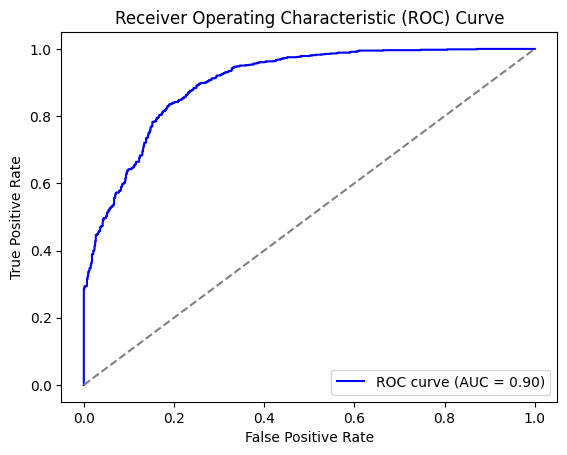

Mean Absolute Percentage Error (MAPE): 9.506172839506172%
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.72      0.79       717
           1       0.79      0.90      0.84       810

    accuracy                           0.82      1527
   macro avg       0.83      0.81      0.82      1527
weighted avg       0.83      0.82      0.82      1527

      Metric     Value
0    AUC/ROC  0.901538
1  Precision  0.786481
2   Accuracy  0.819253
3        MAE  0.180747
4        MSE  0.180747
5       RMSE  0.425143
6       MAPE  9.506173


In [23]:
from sklearn.metrics import (
    roc_auc_score, precision_score, accuracy_score, mean_absolute_error,
    mean_squared_error, roc_curve, classification_report
)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# 1. AUC/ROC
y_pred_prob = svm_model.decision_function(X_test)  # Or use svm_model.predict_proba(X_test) for probabilistic models
auc_score = roc_auc_score(y_test, y_pred_prob)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f"ROC curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()

# 2. Precision
precision = precision_score(y_test, y_pred)

# 3. Accuracy
accuracy = accuracy_score(y_test, y_pred)

# 4. MAE
mae = mean_absolute_error(y_test, y_pred)

# 5. MSE
mse = mean_squared_error(y_test, y_pred)

# 6. RMSE
rmse = np.sqrt(mse)

# 7. MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_indices = y_true != 0  # Filter out zero values
    if np.sum(non_zero_indices) == 0:  # Check if all values are zero
        return np.inf
    return np.mean(np.abs((y_true[non_zero_indices] - y_pred[non_zero_indices]) / y_true[non_zero_indices])) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

# 8. Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Tabulate metrics
metrics_data = {
    "Metric": ["AUC/ROC", "Precision", "Accuracy", "MAE", "MSE", "RMSE", "MAPE"],
    "Value": [auc_score, precision, accuracy, mae, mse, rmse, mape],
}

metrics_table = pd.DataFrame(metrics_data)
print(metrics_table)


In [24]:
joblib.dump(svm_model, 'svm_model.pkl')

['svm_model.pkl']